In [1]:
pip install pystan==2.19.1.1 prophet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

df = pd.read_pickle('Project-3_NYC_311_Calls.pkl')
df = df.set_index(pd.DatetimeIndex(df['Created Date']))
del df['Created Date']

2010-01-01 00:00:00
2023-08-04 12:00:00


<Axes: xlabel='Created Date'>

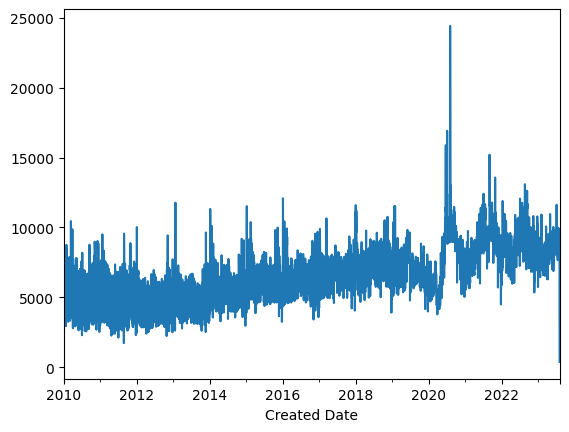

In [3]:
df.head()
df.dtypes
df.isnull().sum()
df.describe()
print(df.index.min())
print(df.index.max())
df.resample('D').size().plot()

In [4]:
# Filter the data for the year 2022
df_2022 = df[df.index.year == 2022]

# Calculate the average number of daily complaints
average_daily_complaints_2022 = df_2022['Unique Key'].resample('D').count().mean()

print(f"The average number of daily complaints received in 2022 is {average_daily_complaints_2022}")


The average number of daily complaints received in 2022 is 8684.320547945206


In [5]:
# Resample the 'Unique Key' column on a daily basis and count the number of complaints for each day
daily_complaints = df['Unique Key'].resample('D').count()

# Find the date with the maximum number of complaints
max_complaints_date = daily_complaints.idxmax()

print(f"The date with the maximum number of calls is {max_complaints_date}")

The date with the maximum number of calls is 2020-08-04 00:00:00


In [6]:
# Filter the data for the date with the maximum number of complaints
df_max_complaints_date = df[df.index.date == max_complaints_date.date()]

# Find the most common complaint type on that date
most_common_complaint = df_max_complaints_date['Complaint Type'].value_counts().idxmax()

print(f"The most common complaint type on the date with the maximum number of calls is {most_common_complaint}")


The most common complaint type on the date with the maximum number of calls is Damaged Tree


In [7]:
# Resample the 'Unique Key' column on a monthly basis and count the number of complaints for each month
monthly_complaints = df['Unique Key'].resample('M').count()

# Find the month with the minimum number of complaints
quietest_month = monthly_complaints.idxmin().month

print(f"The month with the fewest number of calls is {quietest_month}")

The month with the fewest number of calls is 8


In [8]:
import statsmodels.api as sm

# Resample the 'Unique Key' column on a daily basis and count the number of complaints for each day
daily_complaints = df['Unique Key'].resample('D').count()

# Perform ETS decomposition
decomposition = sm.tsa.seasonal_decompose(daily_complaints, model='additive')

# Find the value of the seasonal component on 2020-12-25
seasonal_component = round(decomposition.seasonal.loc['2020-12-25'])

print(f"The value of the seasonal component on 2020-12-25 is {seasonal_component}")



The value of the seasonal component on 2020-12-25 is 183


In [9]:
# Calculate the autocorrelation with a lag of 1
autocorrelation_lag_1 = daily_complaints.autocorr(lag=1)

print(f"The autocorrelation of the number of daily calls with the number of calls the day prior is {autocorrelation_lag_1}")


The autocorrelation of the number of daily calls with the number of calls the day prior is 0.7517059728398577


In [10]:
from prophet import Prophet
from sklearn.metrics import mean_squared_error
import numpy as np

# Prepare the data for Prophet
df_prophet = daily_complaints.reset_index()
df_prophet.columns = ['ds', 'y']

# Split the data into a training set and a test set
train = df_prophet[:-90]
test = df_prophet[-90:]

# Create a new Prophet object
m = Prophet()

# Fit the model to the training data
m.fit(train)

# Make predictions for the test set
forecast = m.predict(test)

# Calculate the RMSE of the predictions
rmse = np.sqrt(mean_squared_error(test['y'], forecast['yhat']))

print(f"The RMSE on the test set is {rmse}")

21:27:12 - cmdstanpy - INFO - Chain [1] start processing
21:27:13 - cmdstanpy - INFO - Chain [1] done processing


The RMSE on the test set is 1233.7312313093698
